# The Battle of Neighborhoods 

Lets import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  51.50 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  35.77 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  40.09 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  48.95 MB/s


In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


### Load and Explore Data

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [5]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

#### Creating a Dataframe with column names

In [6]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 


neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
neighborhoods["Borough"].value_counts()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

In [10]:
neighborhoods.shape

(306, 4)

After exploring the data we find "Queens" is a best area to start a Restaurant

In [11]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


#### Let's explore the Boroughs "Queens" using geolocator

In [12]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.6524927, -73.7914214158161.


In [13]:
map_Queens = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Queens)  
    
map_Queens

Foursquare is used to explore the Neighborhoods of Queens

In [118]:
CLIENT_ID = 'UBQ4IBRXDE03PILR33MXDZ2MHCZMNJXBM1E11NNVY5AI23SF'
CLIENT_SECRET = 'VFFODWPNTQV41M2LI3ZMGO2JE12W5E3QOCE1KU3XYHOIPF5E'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UBQ4IBRXDE03PILR33MXDZ2MHCZMNJXBM1E11NNVY5AI23SF
CLIENT_SECRET:VFFODWPNTQV41M2LI3ZMGO2JE12W5E3QOCE1KU3XYHOIPF5E


In [119]:
neighborhood_latitude = queens_data.loc[0, 'Latitude'] 
neighborhood_longitude = queens_data.loc[0, 'Longitude'] 

neighborhood_name = queens_data.loc[0, 'Neighborhood'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Astoria are 40.76850859335492, -73.91565374304234.


In [120]:
radius = 500 

query = "Restaurant"



url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query{}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    query)
url 





'https://api.foursquare.com/v2/venues/explore?&client_id=UBQ4IBRXDE03PILR33MXDZ2MHCZMNJXBM1E11NNVY5AI23SF&client_secret=VFFODWPNTQV41M2LI3ZMGO2JE12W5E3QOCE1KU3XYHOIPF5E&v=20180605&ll=40.76850859335492,-73.91565374304234&radius=500&queryRestaurant'

In [121]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cc933751ed2196c43e361a0'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4bdf502a89ca76b062b75d5e-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/argentinian_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16b941735',
         'name': 'Brazilian Restaurant',
         'pluralName': 'Brazilian Restaurants',
         'primary': True,
         'shortName': 'Brazilian'}],
       'delivery': {'id': '289413',
        'provider': {'icon': {'name': '/delivery_provider_seamless_20180129.png',
          'prefix': 'https://fastly.4sqi.net/img/general/cap/',
          'sizes': [40, 50]},
         'name': 'seamless'},
        'url': 'https://www.seamless.com/menu/favela-brazilian-cuisine-33-18-28th-ave-astoria/289413?affiliat

In [122]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [123]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)


nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


,name,categories,lat,lng
0,Favela Grill,Brazilian Restaurant,40.767348,-73.917897
1,Orange Blossom,Gourmet Shop,40.769856,-73.917012
2,Titan Foods Inc.,Gourmet Shop,40.769198,-73.919253
3,CrossFit Queens,Gym,40.769404,-73.918977
4,Off The Hook,Seafood Restaurant,40.767200,-73.918104


In [124]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            query)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [125]:

nearby_venues.keys

<bound method NDFrame.keys of                                                name  \
0                                      Favela Grill   
1                                    Orange Blossom   
2                                  Titan Foods Inc.   
3                                   CrossFit Queens   
4                                      Off The Hook   
5                                Simply Fit Astoria   
6                                       Irish Rover   
7                                   Sitan Muay Thai   
8                       Al-sham Sweets and Pastries   
9                                        El Cafetal   
10                                          Sabry's   
11                                          SVL Bar   
12                                            Duzan   
13                                    Neptune Diner   
14                                         Noisette   
15                             Ample Hills Creamery   
16                                 

In [126]:
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )


Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [127]:
print(queens_venues.shape)
queens_venues.head()

(1272, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant
2,Astoria,40.768509,-73.915654,Al-sham Sweets and Pastries,40.768077,-73.911561,Middle Eastern Restaurant
3,Astoria,40.768509,-73.915654,El Cafetal,40.770153,-73.918214,Mexican Restaurant
4,Astoria,40.768509,-73.915654,Sabry's,40.768446,-73.911267,Seafood Restaurant


In [128]:
df1 = queens_venues[['Neighborhood','Venue Category']]
df1.head()

,Neighborhood,Venue Category
0,Astoria,Brazilian Restaurant
1,Astoria,Seafood Restaurant
2,Astoria,Middle Eastern Restaurant
3,Astoria,Mexican Restaurant
4,Astoria,Seafood Restaurant


In [129]:
df1.groupby('Venue Category')['Neighborhood'].count()

Venue Category
Afghan Restaurant                    2
American Restaurant                 21
Arepa Restaurant                     4
Argentinian Restaurant               2
Asian Restaurant                    16
BBQ Joint                            6
Bagel Shop                          22
Bakery                              71
Bistro                               3
Brazilian Restaurant                 4
Breakfast Spot                       8
Buffet                               2
Burger Joint                         9
Burrito Place                        2
Cafeteria                            1
Café                                28
Cajun / Creole Restaurant            4
Cantonese Restaurant                 3
Caribbean Restaurant                21
Chinese Restaurant                 111
Colombian Restaurant                 2
Creperie                             1
Cuban Restaurant                     1
Deli / Bodega                      116
Dim Sum Restaurant                   3
Diner     

In [130]:
print('There are {} uniques categories.'.format(len(df1['Venue Category'].unique())))

There are 90 uniques categories.


In [131]:
queens_onehot = pd.get_dummies(queens_venues[['Venue Category']], prefix="", prefix_sep="")

queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 


fixed_columns = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns]

queens_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Noodle House,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Astoria,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
queens_onehot.shape

(1272, 91)

In [133]:
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Noodle House,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Arverne,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.200000,0.0,0.0,0.000000,0.0,0.000000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.000000,0.0,0.0
1,Astoria,0.0,0.000000,0.0,0.0,0.000000,0.033333,0.033333,0.066667,0.0,0.033333,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.033333,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.133333,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667,0.0,0.033333,0.0,0.033333,0.0,0.066667,0.033333,0.066667,0.0,0.000000,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.033333,0.0,0.0
2,Astoria Heights,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.090909,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.181818,0.0,0.000000,0.0,0.272727,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.090909,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.181818,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,Auburndale,0.0,0.142857,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.285714,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.000000,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.142857,0.0,0.214286,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.071429,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,Bay Terrace,0.0,0.076923,0.0,0.0,0.076923,0.000000,0.000000,0.076923,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.076923,0.0,0.000000,0.153846,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076923,0.076923,0.0,0

In [134]:
queens_grouped.shape

(77, 91)

In [135]:
num_top_venues = 5

for hood in queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = queens_grouped[queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
              venue  freq
0    Sandwich Place   0.4
1       Pizza Place   0.2
2        Donut Shop   0.2
3   Thai Restaurant   0.2
4  Malay Restaurant   0.0


----Astoria----
                      venue  freq
0          Greek Restaurant  0.13
1        Seafood Restaurant  0.10
2        Italian Restaurant  0.07
3  Mediterranean Restaurant  0.07
4                    Bakery  0.07


----Astoria Heights----
                venue  freq
0       Deli / Bodega  0.27
1  Chinese Restaurant  0.18
2  Italian Restaurant  0.18
3              Bakery  0.09
4         Pizza Place  0.09


----Auburndale----
                 venue  freq
0        Deli / Bodega  0.29
1    Korean Restaurant  0.21
2  American Restaurant  0.14
3   Italian Restaurant  0.14
4         Noodle House  0.07


----Bay Terrace----
                 venue  freq
0           Donut Shop  0.15
1          Pizza Place  0.15
2           Restaurant  0.08
3  American Restaurant  0.08
4     Asian Restaurant  0.08


----Bayside----
   

                      venue  freq
0      Caribbean Restaurant   0.8
1             Deli / Bodega   0.2
2  Mediterranean Restaurant   0.0
3         Polish Restaurant   0.0
4               Pizza Place   0.0


----Lefrak City----
                venue  freq
0       Deli / Bodega  0.19
1              Bakery  0.14
2          Donut Shop  0.10
3  Mexican Restaurant  0.05
4          Steakhouse  0.05


----Lindenwood----
                 venue  freq
0               Bakery  0.29
1        Deli / Bodega  0.14
2  Japanese Restaurant  0.14
3          Pizza Place  0.14
4   Chinese Restaurant  0.14


----Little Neck----
                 venue  freq
0   Chinese Restaurant  0.13
1   Italian Restaurant  0.10
2  Japanese Restaurant  0.07
3    Korean Restaurant  0.07
4               Bakery  0.07


----Long Island City----
                venue  freq
0         Pizza Place  0.17
1  Mexican Restaurant  0.13
2                Café  0.13
3       Deli / Bodega  0.10
4          Donut Shop  0.07


----Malba----
    

In [136]:
num_bottom_venues = 5

for hood in queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = queens_grouped[queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[-5:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_bottom_venues))
    print('\n')

----Arverne----
                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    Wings Joint   0.0


----Astoria----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.03
1             Tibetan Restaurant  0.00
2             Turkish Restaurant  0.00
3          Vietnamese Restaurant  0.00
4                    Wings Joint  0.00


----Astoria Heights----
                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    Wings Joint   0.0


----Auburndale----
                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    W

                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    Wings Joint   0.0


----Hunters Point----
                           venue  freq
0          Vietnamese Restaurant  0.03
1             Tibetan Restaurant  0.00
2             Turkish Restaurant  0.00
3  Vegetarian / Vegan Restaurant  0.00
4                    Wings Joint  0.00


----Jackson Heights----
                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    Wings Joint   0.0


----Jamaica Center----
                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    Wings J

                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    Wings Joint   0.0


----Springfield Gardens----
                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    Wings Joint   0.0


----St. Albans----
                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    Wings Joint   0.0


----Steinway----
                           venue  freq
0             Tibetan Restaurant   0.0
1             Turkish Restaurant   0.0
2  Vegetarian / Vegan Restaurant   0.0
3          Vietnamese Restaurant   0.0
4                    Wings Joint 

In [137]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [138]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(queens_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Sandwich Place,Thai Restaurant,Donut Shop,Pizza Place,Wings Joint,Empanada Restaurant,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner
1,Astoria,Greek Restaurant,Seafood Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Italian Restaurant,Bakery,Latin American Restaurant,Creperie,Diner,Pizza Place
2,Astoria Heights,Deli / Bodega,Chinese Restaurant,Italian Restaurant,Pizza Place,Bakery,Food,Burger Joint,Falafel Restaurant,Dim Sum Restaurant,Diner
3,Auburndale,Deli / Bodega,Korean Restaurant,American Restaurant,Italian Restaurant,Noodle House,Food Truck,Fast Food Restaurant,Wings Joint,Empanada Restaurant,Diner
4,Bay Terrace,Donut Shop,Pizza Place,Greek Restaurant,Bakery,Deli / Bodega,Restaurant,Salad Place,Steakhouse,Gluten-free Restaurant,American Restaurant


In [139]:
df1 = queens_venues[['Neighborhood','Venue']]  
df1_grouped = df1.groupby(['Neighborhood'])['Venue'].apply(', '.join).reset_index()
df1_grouped

,Neighborhood,Venue
0,Arverne,"Boardwalk Pizza, Thai Kitchen By The Sea, Dunk..."
1,Astoria,"Favela Grill, Off The Hook, Al-sham Sweets and..."
2,Astoria Heights,"Antonio's Kitchen, Jackson Hole, Rocco's Brick..."
3,Auburndale,"Durso's Pasta & Ravioli Company, The Sweet Sap..."
4,Bay Terrace,"Boston Market, Panera Bread, Dunkin', Ben's Ko..."
5,Bayside,"Avli Little Greek Tavern, The French Workshop,..."
6,Beechhurst,"Tony's Beechhurst Deli, Cascarino's, Dunkin', ..."
7,Bellaire,"Cara Mia Restaurant, China King, Szechuan Kitc..."
8,Belle Harbor,"Pico, Ciro's Pastry, Dunkin', Plum Tomatoes, B..."
9,Bellerose,"Triple Crown Diner, Fat Ernie's Cheesesteak Co..."


In [140]:
df2 = df1.groupby(["Neighborhood"]).count().reset_index()
df2


,Neighborhood,Venue
0,Arverne,5
1,Astoria,30
2,Astoria Heights,11
3,Auburndale,14
4,Bay Terrace,13
5,Bayside,30
6,Beechhurst,6
7,Bellaire,8
8,Belle Harbor,8
9,Bellerose,16


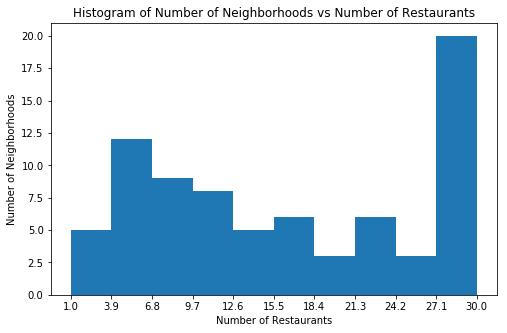

In [141]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

count, bin_edges = np.histogram(df2['Venue'])
 

df2['Venue'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Number of Neighborhoods vs Number of Restaurants') 
plt.xlim = (1,20)
plt.ylabel('Number of Neighborhoods') 
plt.xlabel('Number of Restaurants') 
plt.show()

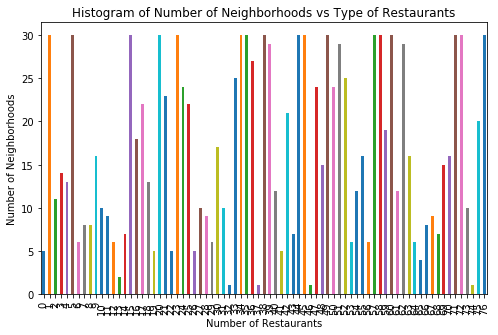

In [142]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

count, bin_edges = np.histogram(df2['Venue'])
 

df2['Venue'].plot(kind='bar', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Number of Neighborhoods vs Type of Restaurants') 
plt.xlim = (1,10)
plt.ylabel('Number of Neighborhoods') 
plt.xlabel('Number of Restaurants') 
plt.show()

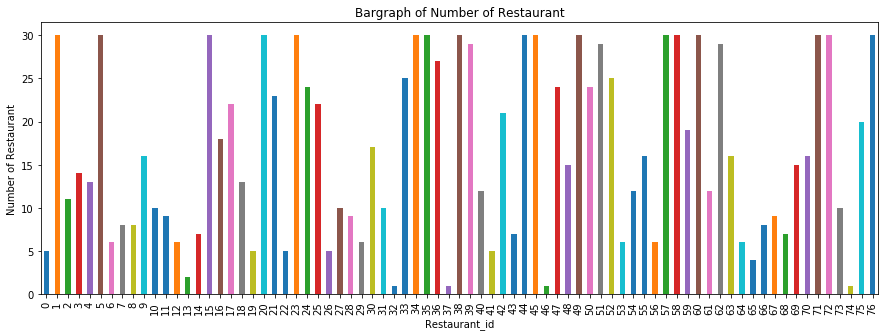

In [153]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

count, bin_edges = np.histogram(df2['Venue'])
 

df2['Venue'].plot(kind='bar', figsize=(15, 5), xticks=bin_edges)
plt.title('Bargraph of Number of Restaurant') 
plt.xlim = (1,20)
plt.ylabel('Number of Restaurant')
plt.xlabel('Restaurant_id') 
plt.show()

In [144]:
test= df2.loc[[0, 4, 25, 53, 64, 69, 71], ["Venue"]].transpose()

test.rename(columns={0:"Astoria", 4:"Howard Beach", 25:"Douglaston", 53: "Jamaica Estates",64: "North Corona", 69: "Astoria Heights", 71: "Sunnyside Gardens"}, inplace=True)
test.transpose()

,Venue
Astoria,5
Howard Beach,13
Douglaston,22
Jamaica Estates,6
North Corona,6
Astoria Heights,15
Sunnyside Gardens,30


In [145]:

kclusters = 5

queens_grouped_clustering = queens_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [146]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

queens_merged = queens_data

queens_merged = queens_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

queens_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,1.0,Greek Restaurant,Seafood Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Italian Restaurant,Bakery,Latin American Restaurant,Creperie,Diner,Pizza Place
1,Queens,Woodside,40.746349,-73.901842,1.0,Bakery,American Restaurant,Latin American Restaurant,Thai Restaurant,Filipino Restaurant,Donut Shop,Restaurant,Pizza Place,Chinese Restaurant,Japanese Restaurant
2,Queens,Jackson Heights,40.751981,-73.882821,1.0,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Pizza Place,Thai Restaurant,Empanada Restaurant,Colombian Restaurant,Italian Restaurant,Cajun / Creole Restaurant
3,Queens,Elmhurst,40.744049,-73.881656,1.0,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,South American Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Hotpot Restaurant,Colombian Restaurant,Pizza Place,Malay Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,1.0,Italian Restaurant,Bagel Shop,Chinese Restaurant,Deli / Bodega,Fast Food Restaurant,Sandwich Place,Tapas Restaurant,Donut Shop,Sushi Restaurant,Fried Chicken Joint


In [151]:
queens_merged.loc[queens_merged['Cluster Labels'] == 0, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]
                 ]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Glendale,Deli / Bodega,Pizza Place,Bakery,Chinese Restaurant,Falafel Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
19,South Ozone Park,Deli / Bodega,Fast Food Restaurant,Food Truck,Sandwich Place,Donut Shop,Food,Empanada Restaurant,Dim Sum Restaurant,Diner,Dumpling Restaurant
21,Whitestone,Deli / Bodega,Cuban Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant
23,Auburndale,Deli / Bodega,Korean Restaurant,American Restaurant,Italian Restaurant,Noodle House,Food Truck,Fast Food Restaurant,Wings Joint,Empanada Restaurant,Diner
30,Briarwood,Deli / Bodega,Food Truck,Indian Restaurant,Mexican Restaurant,Sushi Restaurant,Fast Food Restaurant,Empanada Restaurant,Dim Sum Restaurant,Diner,Donut Shop
42,Broad Channel,Pizza Place,Deli / Bodega,Sandwich Place,Café,Wings Joint,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
64,Brookville,Deli / Bodega,Cuban Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant
69,Utopia,Deli / Bodega,Afghan Restaurant,Bakery,Chinese Restaurant,Donut Shop,South American Restaurant,Korean Restaurant,Pizza Place,Food Court,Fried Chicken Joint
74,Blissville,Deli / Bodega,Chinese Restaurant,Restaurant,Thai Restaurant,Donut Shop,Café,Cafeteria,Wings Joint,Empanada Restaurant,Diner
75,Roxbury,Pizza Place,Fast Food Restaurant,Deli / Bodega,Irish Pub,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant


In [152]:
queens_merged.loc[queens_merged['Cluster Labels'] == 1, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Greek Restaurant,Seafood Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Italian Restaurant,Bakery,Latin American Restaurant,Creperie,Diner,Pizza Place
1,Woodside,Bakery,American Restaurant,Latin American Restaurant,Thai Restaurant,Filipino Restaurant,Donut Shop,Restaurant,Pizza Place,Chinese Restaurant,Japanese Restaurant
2,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Pizza Place,Thai Restaurant,Empanada Restaurant,Colombian Restaurant,Italian Restaurant,Cajun / Creole Restaurant
3,Elmhurst,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,South American Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Hotpot Restaurant,Colombian Restaurant,Pizza Place,Malay Restaurant
4,Howard Beach,Italian Restaurant,Bagel Shop,Chinese Restaurant,Deli / Bodega,Fast Food Restaurant,Sandwich Place,Tapas Restaurant,Donut Shop,Sushi Restaurant,Fried Chicken Joint
5,Corona,Mexican Restaurant,Deli / Bodega,Italian Restaurant,Sandwich Place,Bakery,Chinese Restaurant,Restaurant,Donut Shop,South American Restaurant,Pizza Place
6,Forest Hills,Thai Restaurant,Asian Restaurant,Deli / Bodega,Pizza Place,Food Truck,Eastern European Restaurant,Sandwich Place,Donut Shop,Italian Restaurant,Chinese Restaurant
7,Kew Gardens,Chinese Restaurant,Bakery,Deli / Bodega,Pizza Place,Indian Restaurant,Donut Shop,Diner,Fried Chicken Joint,Café,Sandwich Place
8,Richmond Hill,Chinese Restaurant,Latin American Restaurant,Pizza Place,Diner,Deli / Bodega,Mexican Restaurant,Caribbean Restaurant,Donut Shop,Bakery,Indian Restaurant
9,Flushing,Chinese Restaurant,Hotpot Restaurant,Bakery,Dim Sum Restaurant,Asian Restaurant,Korean Restaurant,Malay Restaurant,Cantonese Restaurant,Dumpling Restaurant,Seafood Restaurant


In [99]:
queens_merged.loc[queens_merged['Cluster Labels'] == 2, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Whitestone,Deli / Bodega,Cuban Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant
64,Brookville,Deli / Bodega,Cuban Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant


In [100]:
queens_merged.loc[queens_merged['Cluster Labels'] == 3, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Greek Restaurant,Seafood Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Italian Restaurant,Bakery,Latin American Restaurant,Creperie,Diner,Pizza Place
1,Woodside,Bakery,American Restaurant,Latin American Restaurant,Thai Restaurant,Filipino Restaurant,Donut Shop,Restaurant,Pizza Place,Chinese Restaurant,Japanese Restaurant
2,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Pizza Place,Thai Restaurant,Empanada Restaurant,Colombian Restaurant,Italian Restaurant,Cajun / Creole Restaurant
3,Elmhurst,Thai Restaurant,Mexican Restaurant,Chinese Restaurant,South American Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Hotpot Restaurant,Colombian Restaurant,Pizza Place,Malay Restaurant
4,Howard Beach,Italian Restaurant,Bagel Shop,Chinese Restaurant,Deli / Bodega,Fast Food Restaurant,Sandwich Place,Tapas Restaurant,Donut Shop,Sushi Restaurant,Fried Chicken Joint
5,Corona,Mexican Restaurant,Sandwich Place,Italian Restaurant,Pizza Place,Empanada Restaurant,Chinese Restaurant,Restaurant,Donut Shop,Latin American Restaurant,South American Restaurant
6,Forest Hills,Thai Restaurant,Deli / Bodega,Pizza Place,Food Truck,Eastern European Restaurant,Asian Restaurant,Sandwich Place,Donut Shop,Italian Restaurant,Chinese Restaurant
7,Kew Gardens,Chinese Restaurant,Bakery,Deli / Bodega,Pizza Place,Indian Restaurant,Donut Shop,Food,Diner,Fried Chicken Joint,Café
8,Richmond Hill,Deli / Bodega,Bakery,Diner,Latin American Restaurant,Pizza Place,Sandwich Place,Taco Place,Indian Restaurant,Chinese Restaurant,Spanish Restaurant
9,Flushing,Chinese Restaurant,Hotpot Restaurant,Bakery,Dim Sum Restaurant,Asian Restaurant,Korean Restaurant,Malay Restaurant,Cantonese Restaurant,Dumpling Restaurant,Seafood Restaurant


In [101]:
queens_merged.loc[queens_merged['Cluster Labels'] == 4, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,Floral Park,Indian Restaurant,Chinese Restaurant,Pizza Place,Wings Joint,Falafel Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
54,Jamaica Estates,Indian Restaurant,Wings Joint,Fast Food Restaurant,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant
